<a href="https://colab.research.google.com/github/Witcape/AI_Practice/blob/main/ITERATION_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function

In [1]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.3 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Non-user install by explicit request
  Created build tracker: /tmp/pip-build-tracker-f8tzzhxr
  Entered build tracker: /tmp/pip-build-tracker-f8tzzhxr
  Created temporary directory: /tmp/pip-install-goyggx0r
  Created temporary directory: /tmp/pip-ephem-wheel-cache-7y004dow
  1 location(s) to search for versions of setuptools:
  * https://pypi.org/simple/setuptools/
  Fetching project page and analyzing links: https://pypi.org/simple/setuptools/
  Getting page https://pypi.org/simple/setuptools/
  Found index url https://pypi.org/simple/
  Looking up "https://pypi.org/simple/setuptools/" in the cache
  Request header has "max_age" as 0, cache bypassed
  No cache entry available
  Start

In [2]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin"

In [3]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
import matplotlib.pyplot as plt
import time

In [4]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.ggmlv3.q5_1.bin:   0%|          | 0.00/9.76G [00:00<?, ?B/s]

In [5]:
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


In [6]:
!pip install pyswarms
import numpy as np
import pyswarms as ps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 5.0 MB/s eta 0:00:00


In [124]:
method =' Quasi-Random Sequence'
prompt = f"generate precisely 100 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [125]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

Llama.generate: prefix-match hit


In [126]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Quasi_Random_Sequence_Initialisation = numbers
print(Quasi_Random_Sequence_Initialisation)

[-8.34, -7.65, -6.98, -6.27, -5.56, -4.85, -4.14, -3.43, -2.72, -2.01, -1.3, -0.69, 0.0, 0.69, 1.3, 2.01, 2.72, 3.43, 4.14, 4.85, 5.56, 6.27, 6.98, 7.65, 8.34]


In [127]:
import numpy as np
import re

def run_pso(
    CostFunction, nVar=10, VarMin=-10, VarMax=10, MaxIt=20, nPop=500,
    w=1, wdamp=0.99, c1=2.05, c2=2.05, n_threads=2, n_batch=512, n_gpu_layers=32, chi=0.729843788
):

    VarSize = (nVar,)
    VelMax = 0.1 * (VarMax - VarMin)
    VelMin = -VelMax


    particles = []
    nSize = np.size(Quasi_Random_Sequence_Initialisation)
    for i in range(nSize):
        position = np.array([Quasi_Random_Sequence_Initialisation[i]] * nVar)
        velocity = np.zeros(VarSize)
        cost = CostFunction(position)
        best_position = position.copy()
        best_cost = cost
        particles.append({
            'Position': position,
            'Velocity': velocity,
            'Cost': cost,
            'Best': {
                'Position': best_position,
                'Cost': best_cost
            }
        })
    for _ in range(nPop - nSize):
        position = np.random.uniform(VarMin, VarMax, VarSize)
        velocity = np.zeros(VarSize)
        cost = CostFunction(position)
        best_position = position.copy()
        best_cost = cost
        particles.append({
            'Position': position,
            'Velocity': velocity,
            'Cost': cost,
            'Best': {
                'Position': best_position,
                'Cost': best_cost
            }
        })

    print(np.size(particles))

    GlobalBest = {'Position': None, 'Cost': np.inf}

    for p in particles:
        if p['Cost'] < GlobalBest['Cost']:
            GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

    BestCost = np.zeros(MaxIt)
    w_values = []
    g_values = []

    for it in range(MaxIt):
        for p in particles:
            # Update Velocity
            r1 = np.random.rand(*VarSize)
            r2 = np.random.rand(*VarSize)
            p['Velocity'] = chi * (
                p['Velocity']
                + c1 * r1 * (p['Best']['Position'] - p['Position'])
                + c2 * r2 * (GlobalBest['Position'] - p['Position'])
            )

            # Apply Velocity Limits
            p['Velocity'] = np.maximum(p['Velocity'], VelMin)
            p['Velocity'] = np.minimum(p['Velocity'], VelMax)

            # Update Position
            p['Position'] += p['Velocity']

            # Velocity Mirror Effect
            IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
            p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

            # Apply Position Limits
            p['Position'] = np.maximum(p['Position'], VarMin)
            p['Position'] = np.minimum(p['Position'], VarMax)

            # Evaluation
            p['Cost'] = CostFunction(p['Position'])

            # Update Personal Best
            if p['Cost'] < p['Best']['Cost']:
                p['Best']['Position'] = p['Position'].copy()
                p['Best']['Cost'] = p['Cost']

                # Update Global Best
                if p['Best']['Cost'] < GlobalBest['Cost']:
                    GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}


        BestCost[it] = GlobalBest['Cost']

        print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")
        g_values.append(GlobalBest['Cost'])
        w *= wdamp

        w_values.append(w)
        g_values.append(GlobalBest['Cost'])

    w_values.append(w)
    print("Final Weights:", w_values)
    return BestCost, w_values, g_values

In [128]:
# def sphere(x):
#     return sum(x**2)

In [129]:
# BestCost, w_values, g_values = run_pso(CostFunction=sphere)

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os

# GNBG class definition
class GNBG:
    def __init__(self, MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition):
        self.MaxEvals = MaxEvals
        self.AcceptanceThreshold = AcceptanceThreshold
        self.Dimension = Dimension
        self.CompNum = CompNum
        self.MinCoordinate = MinCoordinate
        self.MaxCoordinate = MaxCoordinate
        self.CompMinPos = CompMinPos
        self.CompSigma = CompSigma
        self.CompH = CompH
        self.Mu = Mu
        self.Omega = Omega
        self.Lambda = Lambda
        self.RotationMatrix = RotationMatrix
        self.OptimumValue = OptimumValue
        self.OptimumPosition = OptimumPosition
        self.FEhistory = []
        self.FE = 0
        self.BestFoundPosition = None
        self.AcceptanceReachPoint = np.inf
        self.BestFoundResult = np.inf


    def fitness(self, X):
        if len(X.shape)<2:
            X = X.reshape(1,-1)
        SolutionNumber = X.shape[0]
        result = np.nan * np.ones(SolutionNumber)
        for jj in range(SolutionNumber):
            x = X[jj, :].reshape(-1, 1)  # Ensure column vector
            f = np.nan * np.ones(self.CompNum)
            for k in range(self.CompNum):
                if len(self.RotationMatrix.shape) == 3:
                    rotation_matrix = self.RotationMatrix[:, :, k]
                else:
                    rotation_matrix = self.RotationMatrix

                a = self.transform((x - self.CompMinPos[k, :].reshape(-1, 1)).T @ rotation_matrix.T, self.Mu[k, :], self.Omega[k, :])
                b = self.transform(rotation_matrix @ (x - self.CompMinPos[k, :].reshape(-1, 1)), self.Mu[k, :], self.Omega[k, :])
                f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]

            result[jj] = np.min(f)
            if self.FE > (self.MaxEvals-1):
                return result
            self.FE += 1
            self.FEhistory = np.append(self.FEhistory, result[jj])
            if self.BestFoundResult > result[jj]:
                self.BestFoundResult = result[jj]
            if abs(self.FEhistory[self.FE-1] - self.OptimumValue) < self.AcceptanceThreshold and np.isinf(self.AcceptanceReachPoint):
                self.AcceptanceReachPoint = self.FE
        return result
    def transform(self, X, Alpha, Beta):
        Y = X.copy()
        tmp = (X > 0)
        Y[tmp] = np.log(X[tmp])
        Y[tmp] = np.exp(Y[tmp] + Alpha[0] * (np.sin(Beta[0] * Y[tmp]) + np.sin(Beta[1] * Y[tmp])))
        tmp = (X < 0)
        Y[tmp] = np.log(-X[tmp])
        Y[tmp] = -np.exp(Y[tmp] + Alpha[1] * (np.sin(Beta[2] * Y[tmp]) + np.sin(Beta[3] * Y[tmp])))
        return Y

In [131]:
# ProblemIndex = 22  # Choose a problem instance from 1 to 24
# folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat

# # Load GNBG data for the selected problem instance
# if 1 <= ProblemIndex <= 24:
#     filename = f'f{ProblemIndex}.mat'
#     GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']
#     MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
#     AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
#     Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
#     CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
#     MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
#     MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
#     CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
#     CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
#     CompH = np.array(GNBG_tmp['Component_H'][0, 0])
#     Mu = np.array(GNBG_tmp['Mu'][0, 0])
#     Omega = np.array(GNBG_tmp['Omega'][0, 0])
#     Lambda = np.array(GNBG_tmp['lambda'][0, 0])
#     RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
#     OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
#     OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])
# else:
#     raise ValueError('ProblemIndex must be between 1 and 24.')

# # Initialize GNBG problem instance
# gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)
# popsize = 500000
# print(MaxEvals // popsize)

In [132]:
# nVar = Dimension
# VarMin = MinCoordinate
# VarMax = MaxCoordinate
# popsize = 500000
# nPop = 100
# maxiter = MaxEvals // popsize

# BestCost, w_values, g_values, milestone_results = run_pso(
#     CostFunction=gnbg.fitness,
#     nVar=nVar,
#     VarMin=VarMin,
#     VarMax=VarMax,
#     MaxIt=maxiter,
#     nPop=nPop
# )

In [133]:
# milestone_means = {}
# milestone_stds = {}

# for milestone, costs in milestone_results.items():
#     if costs:  # Check if there are any results for this milestone
#         mean_cost = np.mean(costs)
#         std_cost = np.std(costs)
#         milestone_means[milestone] = mean_cost
#         milestone_stds[milestone] = std_cost
#         print(f"At {milestone} function evaluations - Mean Cost: {mean_cost}, Std Dev: {std_cost}")

# # Plot milestone results: Mean cost with standard deviation error bars
# milestones_sorted = sorted(milestone_means.keys())
# means = [milestone_means[m] for m in milestones_sorted]
# stds = [milestone_stds[m] for m in milestones_sorted]

# plt.errorbar(milestones_sorted, means, yerr=stds, fmt='o', color='b', capsize=5)
# plt.xlabel('Function Evaluations')
# plt.ylabel('Cost')
# plt.title('Cost vs Function Evaluations with Std Dev')
# plt.show()

In [134]:
# plt.plot(w_values)
# plt.xlabel('Iteration')
# plt.ylabel('Inertia Weight (w)')
# plt.title('Inertia Weight Over Iterations')
# plt.show()

In [135]:
# plt.plot(g_values)
# plt.xlabel('Iteration')
# plt.ylabel('Global Best Position Value')
# plt.title('Global Best Position Over Iterations')
# plt.show()

In [136]:
# # Print best cost and best position
# print("Best Cost Found by PSO:\n\n", BestCost)

# # Print the position corresponding to the best cost
# print("\n\nBest Position:", g_values[-1])

# RUN ALL ALGOS

In [137]:
costs = []
errors = []

In [138]:
def run_all_problems(folder_path, num_problems=24):
    all_results = {}

    for problem_index in range(1, num_problems + 1):
        start_time = time.time()

        filename = f'f{problem_index}.mat'
        GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']

        MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
        AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
        Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
        CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
        MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
        MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
        CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
        CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
        CompH = np.array(GNBG_tmp['Component_H'][0, 0])
        Mu = np.array(GNBG_tmp['Mu'][0, 0])
        Omega = np.array(GNBG_tmp['Omega'][0, 0])
        Lambda = np.array(GNBG_tmp['lambda'][0, 0])
        RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
        OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
        OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])


        # Initialize GNBG problem instance
        gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)

        # Run PSO for the current problem
        nVar = Dimension
        VarMin = MinCoordinate
        VarMax = MaxCoordinate
        # MaxEvals = 500000
        nPop = 100
        # maxiter = MaxEvals // nPop
        maxiter = 500

        BestCost, w_values, g_values = run_pso(
            CostFunction=gnbg.fitness,
            nVar=nVar,
            VarMin=VarMin,
            VarMax=VarMax,
            MaxIt=maxiter,
            nPop=nPop
        )

        error = abs(BestCost[-1] - gnbg.OptimumValue)

        # Add error to results dictionary
        all_results[problem_index] = {
            'BestCost': BestCost,
            'BestPosition': g_values[-1],
            'w_values': w_values,
            'g_values': g_values,
            'OptimumValue': gnbg.OptimumValue,
            'Error': error
        }
        end_time = time.time()
        iteration_time = end_time - start_time

        print(f"Problem {problem_index} Best Cost:", BestCost)
        print(f"Problem {problem_index} Error:", error)
        print(f"Problem {problem_index} Time Taken: {iteration_time:.4f} seconds")


    return all_results

In [139]:
# Run for all 24 problems
folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat
results = run_all_problems(folder_path)

for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['BestPosition'])
    costs.append(problem_results['BestPosition'])

# # Example of how to access results for a particular problem
# problem_1_results = results[1]
# print("\n\n\nProblem 1 Best Cost:", problem_1_results['BestCost'])
# print("Problem 1 Best Position:", problem_1_results['BestPosition'])
# print("Problem 1 Error:", problem_1_results['Error'])

# # Plotting results for one of the problems (e.g., Problem 1)
# plt.plot(problem_1_results['w_values'])
# plt.xlabel('Iteration')
# plt.ylabel('Inertia Weight (w)')
# plt.title('Inertia Weight Over Iterations - Problem 1')
# plt.show()

# plt.plot(problem_1_results['g_values'])
# plt.xlabel('Iteration')
# plt.ylabel('Global Best Position Value')
# plt.title('Global Best Position Over Iterations - Problem 1')
# plt.show()


100
Iteration 1: Best Cost = 65271.23227522402
Iteration 2: Best Cost = 55720.14519132881


<ipython-input-130-920e6cc4fb83>:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]
<ipython-input-127-f2f9ec8f53c4>:98: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  BestCost[it] = GlobalBest['Cost']


Streaming output truncated to the last 5000 lines.
 -4303.3698794  -4303.69293354 -4306.62100494 -4306.62100494
 -4307.03711767 -4310.02690285 -4310.02690285 -4310.02690285
 -4311.1233297  -4311.1233297  -4311.71421969 -4311.71421969
 -4311.71421969 -4312.01514847 -4312.88410827 -4312.88410827
 -4313.30544477 -4313.30544477 -4314.03488008 -4314.03488008
 -4314.25529867 -4314.25529867 -4314.25529867 -4315.18115718
 -4315.26498873 -4315.26498873 -4315.48749084 -4315.48749084
 -4315.48749084 -4315.87503166 -4315.87503166 -4315.87503166
 -4316.25391625 -4316.25391625 -4316.25391625 -4316.26086809
 -4316.83957996 -4316.83957996 -4316.97964289 -4317.02691746
 -4317.04329267 -4317.04329267 -4317.04344265 -4317.04344265
 -4317.07912406 -4317.07912406 -4317.22999179 -4317.25204756
 -4317.28947314 -4317.28947314 -4317.28947314 -4317.31978283
 -4317.3295181  -4317.3295181  -4317.3295181  -4317.3295181
 -4317.40209076 -4317.44875314 -4317.44875314 -4317.47740505
 -4317.47740505 -4317.51628636 -431

In [140]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['Error'])
    errors.append(problem_results['Error'])

5.284164217300713e-10
0.31729664000329194
0.0001285052827029176
6.478848035840201e-08
1.19964690837719
1.4125656374070559
21162.431664808944
15513.50923827624
1084.9695444465049
6864.703004819156
18815.60114252807
13152.92625515495
1167.5554441808035
15545.290672307503
6.351564498271955
682.1000000000686
682.1029172446551
20043.16670913549
13265.608731011938
6.237624270177562
5.0
110903.25747756676
42.82997569533611
133.14690030704438





Problem 1 Best Cost: [ 6.52712323e+04  5.57201452e+04  4.44852445e+04  3.59672358e+04
  2.79263749e+04  2.21333639e+04  1.83550680e+04  1.71541125e+04
  1.17807825e+04  7.98258316e+03  7.11054315e+03  5.82302457e+03
  5.82302457e+03  3.83652948e+03  2.36859482e+03  2.25242440e+03
  1.69196241e+03  1.69196241e+03  8.77882436e+02  7.93233155e+02
  9.50317726e+01  4.56066183e+01  4.56066183e+01  4.56066183e+01
  4.56066183e+01 -6.74345497e+01 -1.49132484e+02 -3.53821570e+02
 -3.80264242e+02 -3.80264242e+02 -3.80264242e+02 -4.12610126e+02
 -5.65600595e+02 -5.85927836e+02 -6.76176435e+02 -6.76176435e+02
 -7.24365222e+02 -7.27552950e+02 -7.51408072e+02 -7.51408072e+02
 -7.51408072e+02 -7.51408072e+02 -8.23261624e+02 -8.24276871e+02
 -8.24276871e+02 -8.24276871e+02 -8.79077143e+02 -8.79077143e+02
 -8.79077143e+02 -9.09069448e+02 -9.09069448e+02 -9.37163142e+02
 -9.72325942e+02 -9.73565911e+02 -9.88574836e+02 -9.88574836e+02
 -9.88574836e+02 -1.00233627e+03 -1.00233627e+03 -1.01303090e+03
 

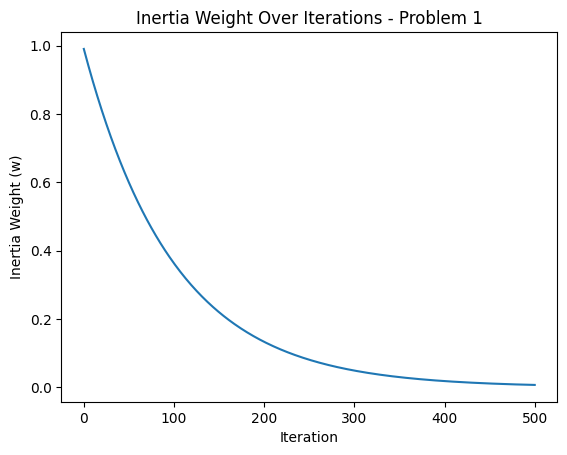

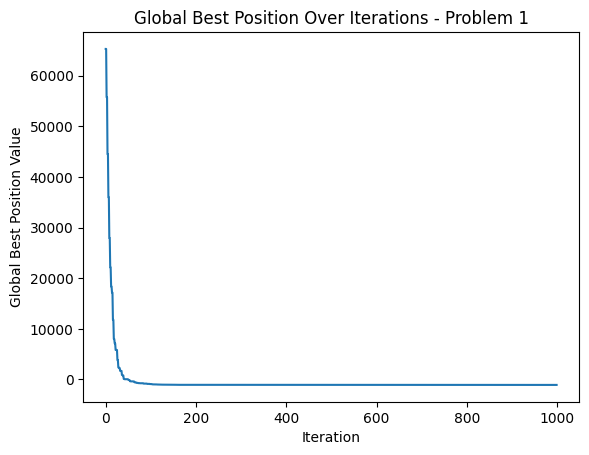




Problem 2 Best Cost: [-701.39433341 -701.41748001 -701.42919475 -701.44634453 -701.4698633
 -701.5020329  -701.52365997 -701.54247344 -701.55335838 -701.57016743
 -701.60293552 -701.61866021 -701.62050848 -701.66739768 -701.66739768
 -701.67583922 -701.68625754 -701.68625754 -701.68693484 -701.70168489
 -701.71079755 -701.72954392 -701.72954392 -701.73334864 -701.73585486
 -701.76359648 -701.76359648 -701.76359648 -701.76708225 -701.78200496
 -701.78297188 -701.78297188 -701.78297188 -701.79859442 -701.80015929
 -701.80477623 -701.80824628 -701.80873332 -701.82643299 -701.8351424
 -701.84474841 -701.84708443 -701.84847448 -701.86647925 -701.86647925
 -701.87109671 -701.87871074 -701.87871074 -701.88978508 -701.89064949
 -701.89064949 -701.90928246 -701.90928246 -701.90928246 -701.90928246
 -701.91094426 -701.91099367 -701.91099367 -701.91157673 -701.91158552
 -701.91379261 -701.92223915 -701.92223915 -701.92223915 -701.93315598
 -701.93315598 -701.93552644 -701.93659081 -701.9365908

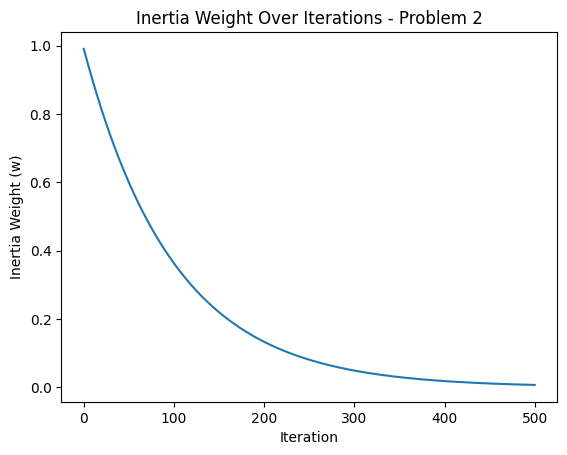

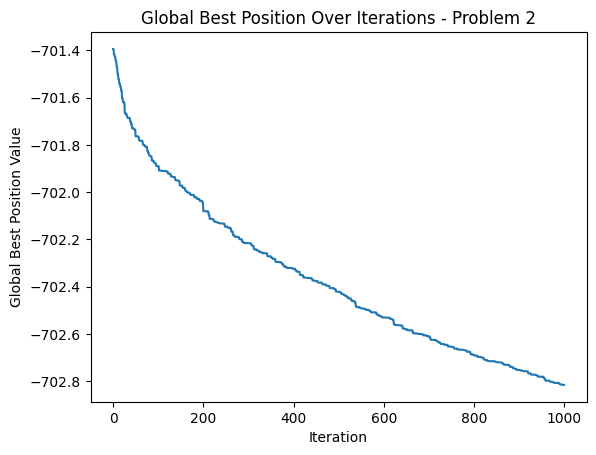




Problem 3 Best Cost: [ 3.35094241e+10  2.37472570e+10  2.03733789e+10  1.54801935e+10
  1.03285507e+10  7.12790620e+09  6.75341849e+09  5.50883366e+09
  4.69722290e+09  3.32784753e+09  3.00890979e+09  2.35747189e+09
  1.78179423e+09  1.61651841e+09  1.51554079e+09  1.20041638e+09
  1.13684359e+09  9.35040325e+08  7.86988148e+08  7.62419491e+08
  4.74315530e+08  4.74315530e+08  4.74315530e+08  4.74315530e+08
  4.08814572e+08  2.75823312e+08  2.54876537e+08  2.23572956e+08
  2.23572956e+08  2.12619327e+08  1.34441588e+08  1.34441588e+08
  1.34441588e+08  1.19402780e+08  1.19402780e+08  7.91523735e+07
  7.91523735e+07  7.53641621e+07  5.52315996e+07  5.41411633e+07
  5.28141645e+07  5.10026630e+07  5.10026630e+07  5.08733954e+07
  3.91964213e+07  3.44824881e+07  3.44824881e+07  3.03971542e+07
  3.03971542e+07  2.80386010e+07  2.80386010e+07  2.80386010e+07
  2.75773802e+07  2.75773802e+07  2.57706205e+07  2.57706205e+07
  2.34864399e+07  2.32783553e+07  2.32783553e+07  1.13892055e+07
 

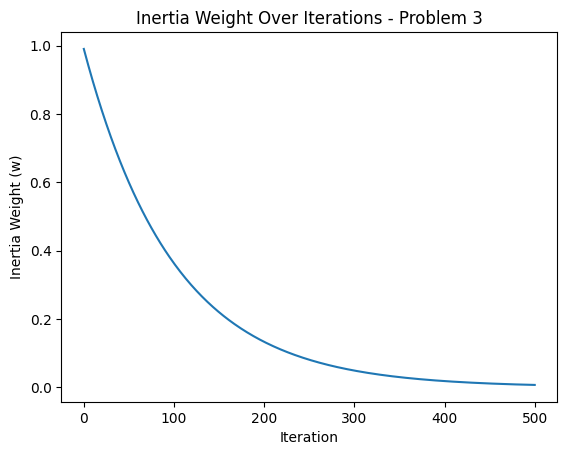

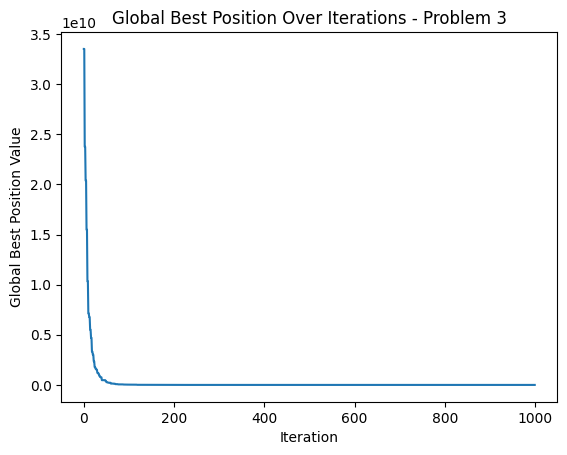




Problem 4 Best Cost: [ 3.89357475e+05  3.50711621e+05  2.76753564e+05  2.09269236e+05
  1.58982039e+05  1.09807910e+05  7.82034413e+04  6.44130212e+04
  6.44130212e+04  5.77546128e+04  4.26457791e+04  3.13476146e+04
  3.07599832e+04  2.62713509e+04  1.87810817e+04  1.50413310e+04
  1.13222848e+04  1.01211585e+04  5.93639455e+03  5.52189201e+03
  5.49271244e+03  5.49271244e+03  5.49271244e+03  4.67404545e+03
  4.42730457e+03  4.26015168e+03  4.26015168e+03  3.97687560e+03
  3.42086037e+03  2.91619663e+03  2.14287969e+03  2.11711869e+03
  2.11711869e+03  1.38053379e+03  1.38053379e+03  1.38053379e+03
  1.38053379e+03  1.30374265e+03  1.07004780e+03  1.07004780e+03
  1.00875398e+03  9.20151163e+02  7.69300353e+02  7.69300353e+02
  7.69300353e+02  4.13045496e+02  4.13045496e+02  4.13045496e+02
  3.85675695e+02  3.55831833e+02  3.09826586e+02  3.09826586e+02
  3.09826586e+02  2.99811834e+02  2.33602421e+02  2.33602421e+02
  1.16552649e+02  1.16552649e+02  2.44418492e+01  2.44418492e+01
 

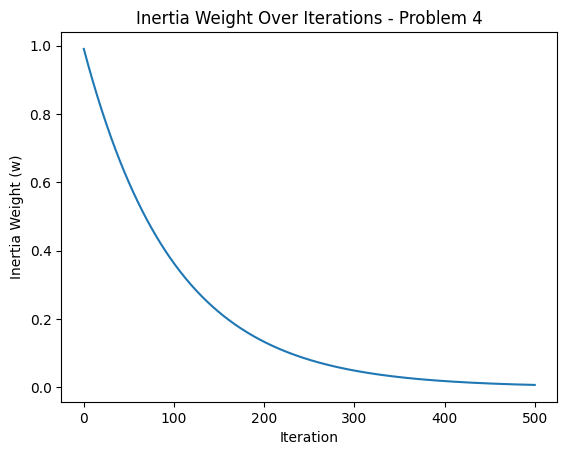

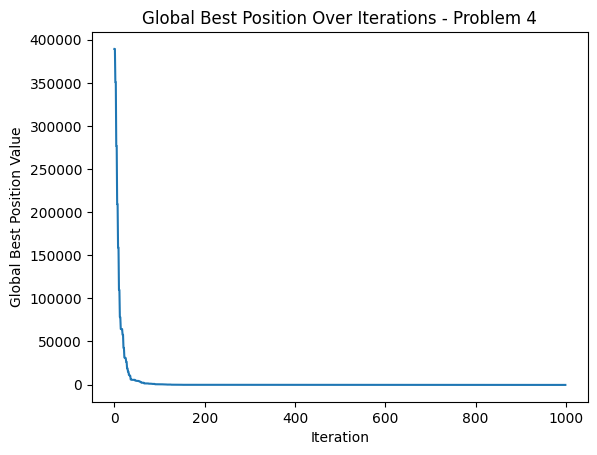




Problem 5 Best Cost: [-334.17940163 -334.23315287 -334.29440294 -334.32936338 -334.42430078
 -334.47089323 -334.48011015 -334.49342998 -334.54543507 -334.59084527
 -334.59084527 -334.62948773 -334.62948773 -334.65686766 -334.70852605
 -334.70852605 -334.72546658 -334.73427667 -334.77133634 -334.79174034
 -334.79976065 -334.82095578 -334.82480367 -334.82480367 -334.83398
 -334.85769364 -334.89470659 -334.89586067 -334.9021351  -334.9021351
 -334.91162555 -334.91162555 -334.91320652 -334.92090388 -334.94861199
 -334.94861199 -334.94861199 -334.96449107 -334.96898372 -334.98245468
 -334.98245468 -334.98245468 -334.99061907 -334.99132272 -335.01146404
 -335.01146404 -335.01146404 -335.01146404 -335.01146404 -335.01146404
 -335.01146404 -335.01678511 -335.04073953 -335.04429866 -335.08399617
 -335.08999614 -335.09874839 -335.1188293  -335.1188293  -335.1188293
 -335.1188293  -335.12326986 -335.12326986 -335.12326986 -335.15838663
 -335.15838663 -335.15838663 -335.15900183 -335.15900183 -

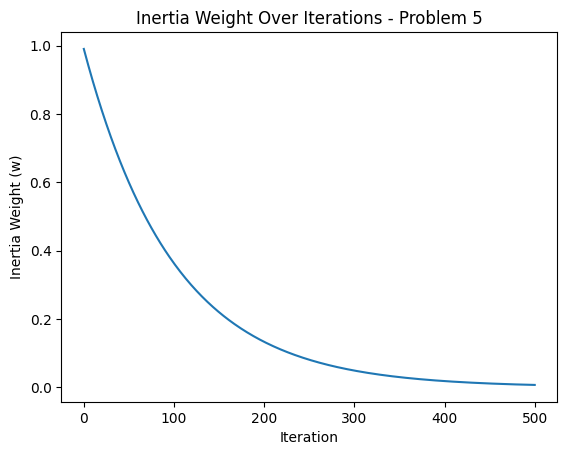

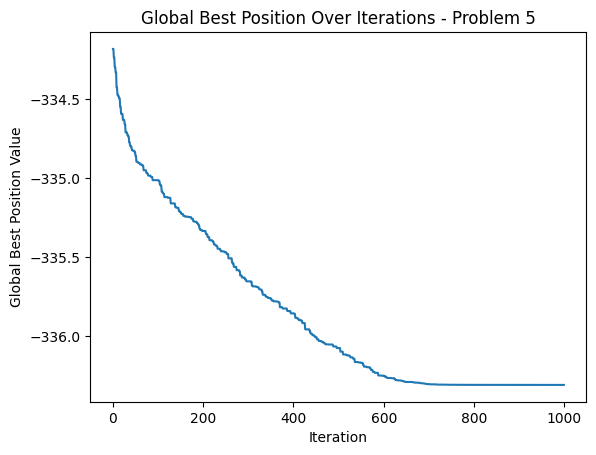




Problem 6 Best Cost: [-183.56264966 -183.60552065 -183.67726554 -183.68358405 -183.73305943
 -183.76740029 -183.76740029 -183.80031101 -183.88368151 -183.90673688
 -183.90949472 -183.92864186 -183.95101917 -183.978164   -184.00136893
 -184.01143909 -184.04935898 -184.0512603  -184.05157531 -184.08132275
 -184.10036003 -184.10036003 -184.10036003 -184.12368668 -184.16217962
 -184.16574436 -184.16574436 -184.17964297 -184.17964297 -184.18920796
 -184.19254869 -184.21359345 -184.26736241 -184.26736241 -184.26736241
 -184.29839717 -184.29839717 -184.29897362 -184.29897362 -184.29897362
 -184.29897362 -184.31372623 -184.36428688 -184.36428688 -184.36428688
 -184.39335366 -184.39335366 -184.39335366 -184.39956128 -184.39956128
 -184.39956128 -184.39956128 -184.39956128 -184.41263261 -184.4465991
 -184.4465991  -184.45069463 -184.45069463 -184.45069463 -184.45647004
 -184.46276766 -184.46276766 -184.47479155 -184.4798496  -184.54689155
 -184.54689155 -184.54689155 -184.54689155 -184.546891

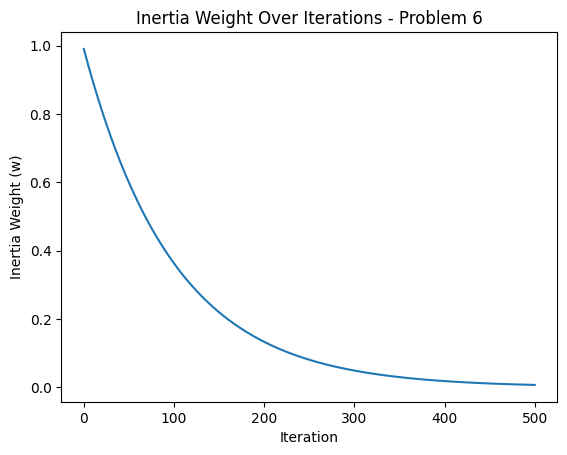

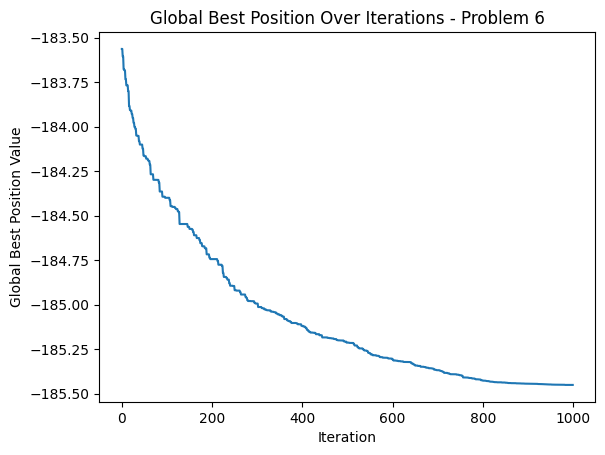




Problem 7 Best Cost: [46129.83917582 45426.03364377 45426.03364377 45426.03364377
 45426.03364377 44809.66671062 44809.66671062 44809.66671062
 44809.66671062 44410.6697629  43844.85804269 43844.85804269
 43691.76708302 43665.04781852 43454.81265921 43454.81265921
 42243.56839649 41554.81032692 39721.63614297 38226.06558255
 38226.06558255 38226.06558255 38226.06558255 38226.06558255
 38009.41252736 37646.57048787 37019.18583914 36620.44506392
 36620.44506392 36620.44506392 36524.35278742 36148.67284756
 35872.61251382 35234.030397   35192.41542679 34698.73111543
 32949.79203387 32949.79203387 32949.79203387 32949.79203387
 32949.79203387 32949.79203387 32949.79203387 32949.79203387
 32949.79203387 32949.79203387 32949.79203387 31176.61776245
 29314.22739834 29314.22739834 29127.92463424 29127.92463424
 28596.46273041 28596.46273041 27764.03614411 27072.27177417
 27072.27177417 27072.27177417 27072.27177417 27072.27177417
 27072.27177417 27072.27177417 27033.48197935 26711.56796428


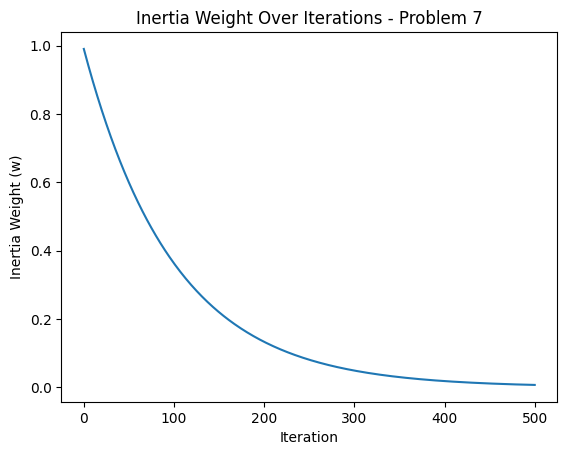

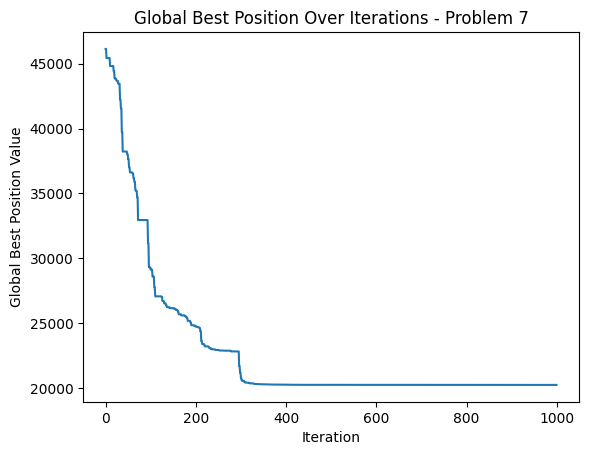




Problem 8 Best Cost: [40781.22506508 40781.22506508 40781.22506508 40781.22506508
 40781.22506508 40781.22506508 40302.41929177 37182.27218372
 35889.50511072 35889.50511072 35657.57299389 35657.57299389
 35242.15462639 35242.15462639 35242.15462639 35242.15462639
 35242.15462639 34608.57930494 34608.57930494 34608.57930494
 33693.43111818 30657.63876949 30657.63876949 30657.63876949
 30588.3356991  30588.3356991  28653.86208646 28653.86208646
 28653.86208646 28653.86208646 28653.86208646 28653.86208646
 28403.2890133  28403.2890133  27570.38642479 27570.38642479
 27438.56419192 27438.56419192 27393.2276757  27393.2276757
 27393.2276757  27393.2276757  27120.4293152  27120.4293152
 26854.04042737 26854.04042737 26854.04042737 26854.04042737
 26854.04042737 26854.04042737 26571.57392578 26301.31146601
 26301.31146601 26301.31146601 25934.7399679  25934.7399679
 25934.7399679  25934.7399679  25934.7399679  25934.7399679
 25863.33271638 25752.57691525 25612.79341934 25612.79341934
 256

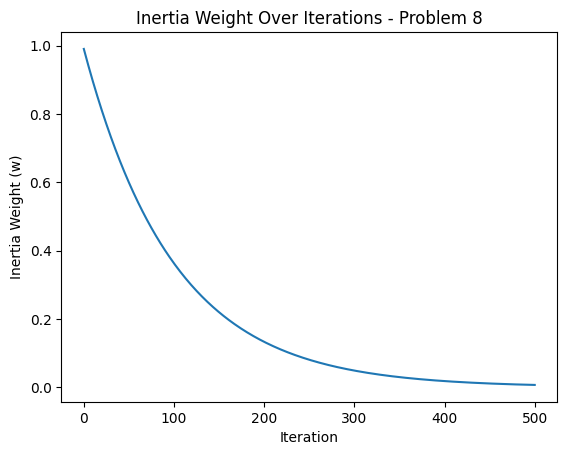

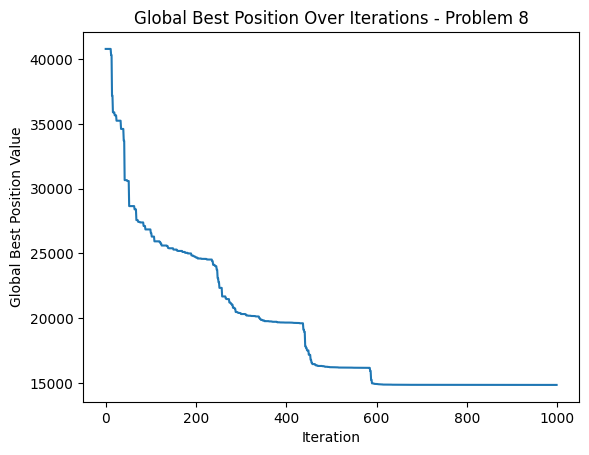




Problem 9 Best Cost: [183832.73079627 183832.73079627  95481.48489822  74882.67835151
  74882.67835151  74882.67835151  74882.67835151  74882.67835151
  60303.07450373  60303.07450373  60303.07450373  60303.07450373
  60303.07450373  60303.07450373  60303.07450373  60303.07450373
  56514.06640461  56514.06640461  33410.07965696  33410.07965696
  33410.07965696  33410.07965696  33410.07965696  33410.07965696
  33410.07965696  33410.07965696  17620.48550824  17620.48550824
  12734.48583431  12734.48583431  12734.48583431  12734.48583431
  12734.48583431  12734.48583431  12734.48583431  12734.48583431
  12734.48583431  12734.48583431  11361.50028549  11361.50028549
  11361.50028549  11361.50028549  11361.50028549  11361.50028549
  11361.50028549  11361.50028549  11361.50028549  11361.50028549
   8228.0046471    8228.0046471    8228.0046471    8228.0046471
   6011.45059973   6011.45059973   6011.45059973   6011.45059973
   6011.45059973   6011.45059973   6011.45059973   6011.45059973
  

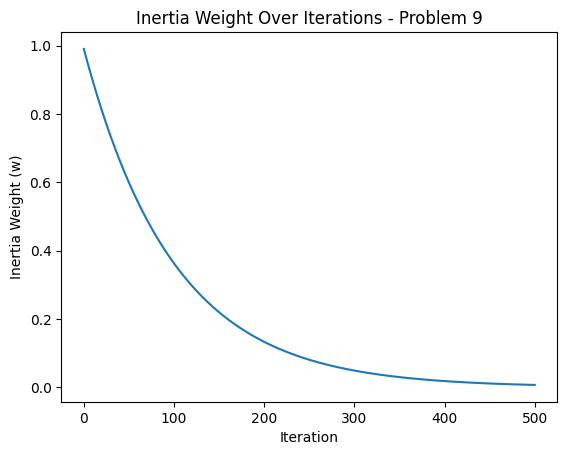

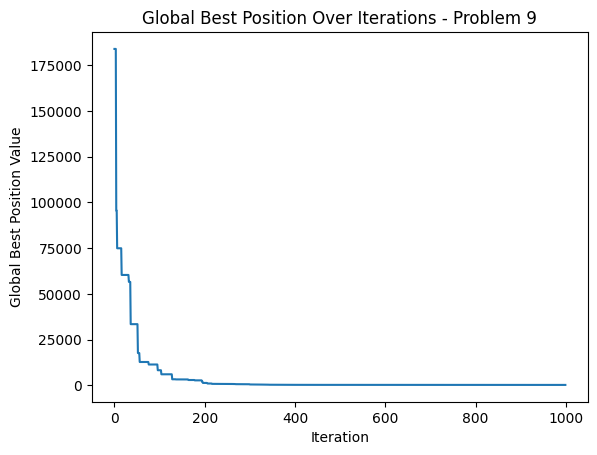




Problem 10 Best Cost: [37111.44017296 34817.24122843 31466.96036715 31466.96036715
 28983.33936105 28478.18167655 27999.27900311 27783.86066817
 27783.86066817 25221.28852646 25221.28852646 24601.96252879
 24110.06958466 24000.8972484  23034.10265915 22921.24927282
 22766.20151005 22766.20151005 21975.90328754 21975.90328754
 21975.90328754 21975.90328754 21406.87319885 21406.87319885
 21406.87319885 20082.20465483 20082.20465483 20082.20465483
 19815.95593809 19815.95593809 18634.99144314 18634.99144314
 18634.99144314 18634.99144314 17369.00130937 16906.59666321
 16906.59666321 16906.59666321 16906.59666321 16906.59666321
 16906.59666321 15254.87417154 13898.19715515 13898.19715515
 13898.19715515 13898.19715515 13724.59445547 13724.59445547
 13567.27612812 13567.27612812 13567.27612812 12880.32030453
 12490.21476058 12490.21476058 12490.21476058 12330.03128157
 12330.03128157 12040.6840443  12040.6840443  11570.63349117
 11570.63349117 11570.63349117 11570.63349117 11570.63349117

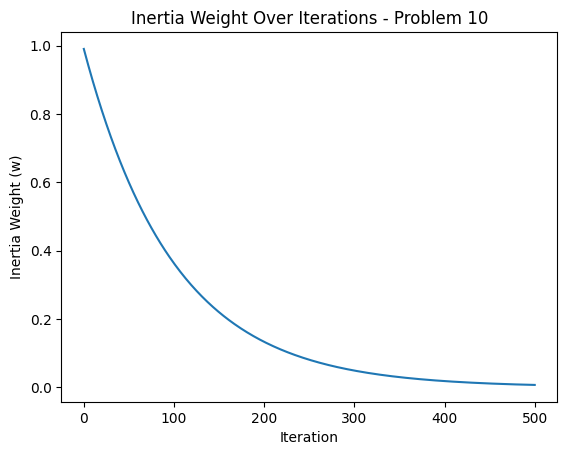

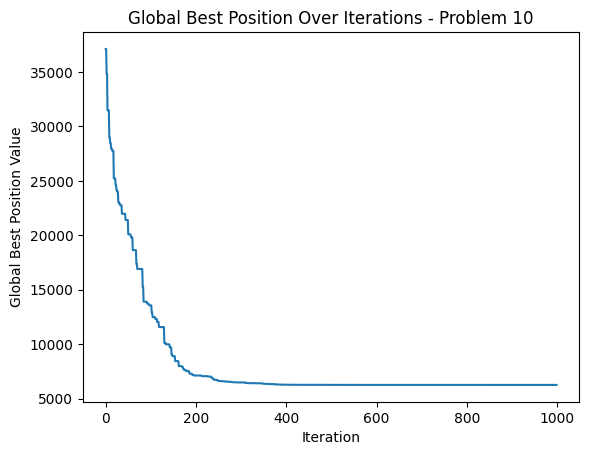




Problem 11 Best Cost: [52299.73367296 51922.34383106 50685.73180439 49001.81122076
 49001.81122076 49001.81122076 45069.17884195 42158.66281885
 42158.66281885 41381.73703741 38968.27606679 35510.89312361
 35510.89312361 35510.89312361 35510.89312361 29477.74431747
 29477.74431747 29477.74431747 29477.74431747 29477.74431747
 29477.74431747 29477.74431747 29477.74431747 29477.74431747
 29477.74431747 27747.27653887 27747.27653887 25882.28816302
 25882.28816302 25882.28816302 25806.52029263 25806.52029263
 25806.52029263 25806.52029263 25562.8340409  25562.8340409
 25562.8340409  25173.15911202 25173.15911202 25173.15911202
 25080.39096808 25080.39096808 22752.32150732 22752.32150732
 22752.32150732 22752.32150732 22752.32150732 22493.94292308
 22493.94292308 22493.94292308 22493.94292308 22116.20555359
 22116.20555359 22116.20555359 22116.20555359 22116.20555359
 22116.20555359 22116.20555359 22116.20555359 22116.20555359
 22116.20555359 22116.20555359 22050.18958789 20612.29818705


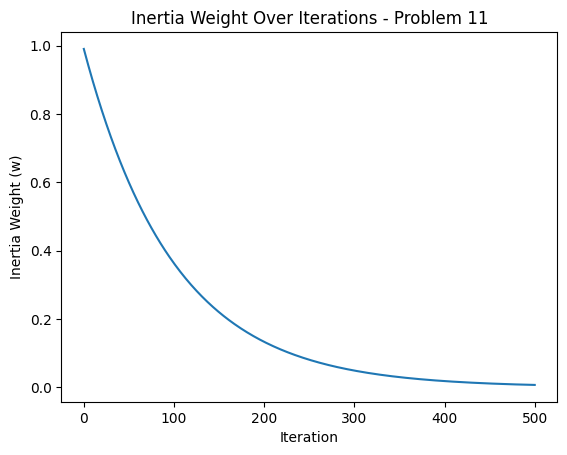

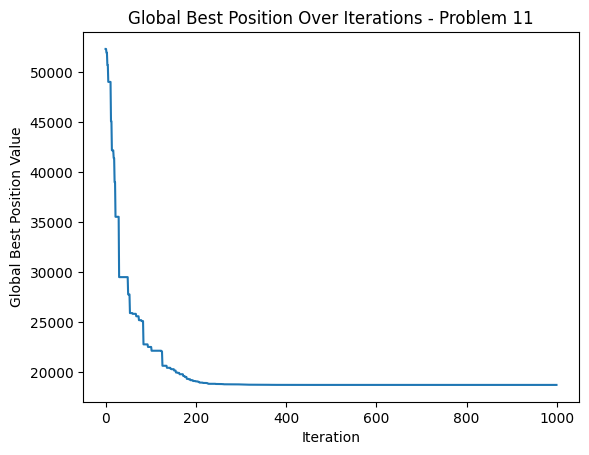




Problem 12 Best Cost: [50862.64041826 42221.37298676 36972.73239893 36972.73239893
 36854.90539887 36854.90539887 31003.57358242 31003.57358242
 31003.57358242 31003.57358242 31003.57358242 29965.45421579
 28783.01995389 28783.01995389 28741.44602351 28741.44602351
 23627.76055896 23627.76055896 23627.76055896 23627.76055896
 23627.76055896 23627.76055896 23627.76055896 23627.76055896
 23627.76055896 21353.49996941 21353.49996941 21353.49996941
 21353.49996941 21353.49996941 21353.49996941 21353.49996941
 20924.84976293 20924.84976293 18841.56250214 18841.56250214
 18841.56250214 18841.56250214 18841.56250214 18841.56250214
 18841.56250214 18841.56250214 18191.47858552 18191.47858552
 18191.47858552 18060.43142369 17646.41581038 17646.41581038
 17646.41581038 15737.45180002 15737.45180002 15737.45180002
 15737.45180002 15737.45180002 15737.45180002 15718.35659833
 15714.43857487 15661.95815059 15661.95815059 15637.53149996
 15637.53149996 15637.53149996 15637.53149996 15637.53149996

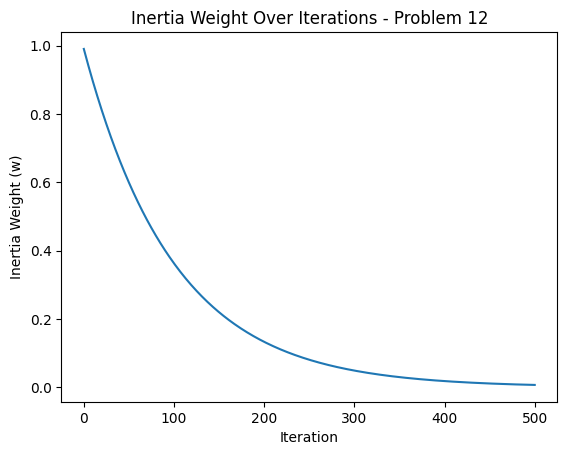

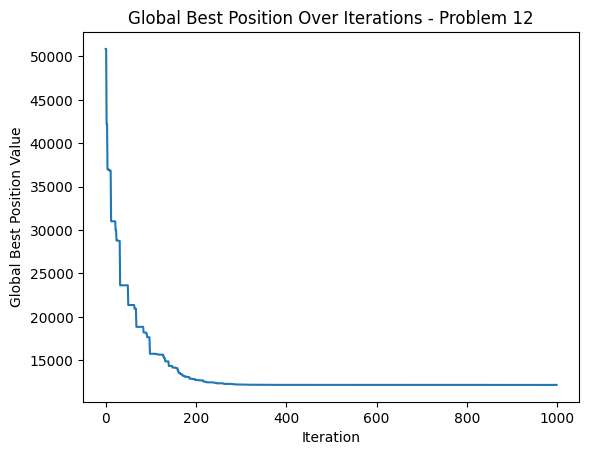




Problem 13 Best Cost: [182842.80542345 160657.36584941 160657.36584941  82733.69745234
  82733.69745234  82733.69745234  82733.69745234  82733.69745234
  82733.69745234  82733.69745234  82733.69745234  82733.69745234
  77323.69101873  69096.76408909  69096.76408909  58035.26125194
  58035.26125194  58035.26125194  58035.26125194  58035.26125194
  58035.26125194  58035.26125194  58035.26125194  58035.26125194
  58035.26125194  58035.26125194  58035.26125194  58035.26125194
  58035.26125194  58035.26125194  30997.21647823  30997.21647823
  30997.21647823  30997.21647823  30997.21647823  30997.21647823
  30997.21647823  30997.21647823  30997.21647823  30997.21647823
  30997.21647823  19860.08976577  19860.08976577  19860.08976577
  19860.08976577  19860.08976577  19860.08976577  19860.08976577
  19860.08976577  19860.08976577  19860.08976577  19860.08976577
  19860.08976577  19860.08976577  19860.08976577  19860.08976577
  19860.08976577  19860.08976577  19860.08976577  19860.08976577


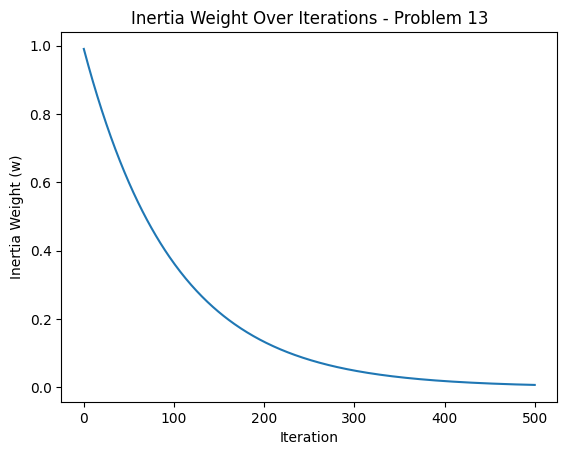

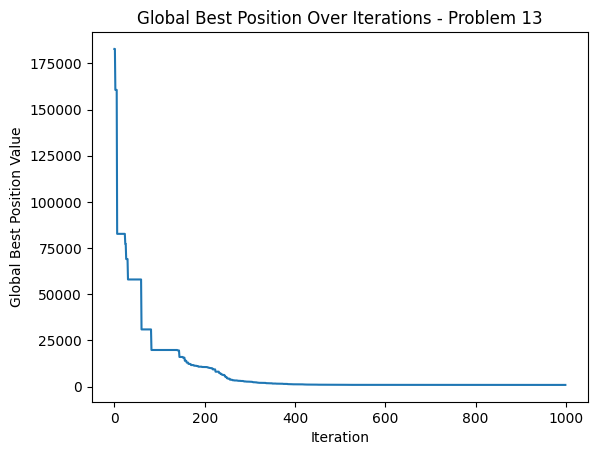




Problem 14 Best Cost: [24083.27865289 22892.64810183 22892.64810183 22892.64810183
 22840.67429788 22131.16899205 22131.16899205 22131.16899205
 20938.05533122 20938.05533122 20938.05533122 20938.05533122
 20938.05533122 20938.05533122 20938.05533122 20938.05533122
 20938.05533122 20938.05533122 20938.05533122 20938.05533122
 20938.05533122 20938.05533122 20938.05533122 20874.29828046
 20513.77050264 20513.77050264 20513.77050264 20508.86641418
 19773.6254727  19773.6254727  19773.6254727  19773.6254727
 19773.6254727  19773.6254727  19773.6254727  19620.27395199
 19620.27395199 19440.78468717 19440.78468717 19396.68217738
 19314.09361266 19314.09361266 19314.09361266 19314.09361266
 19314.09361266 19314.09361266 19314.09361266 19314.09361266
 19283.44119832 19283.44119832 19283.44119832 19283.44119832
 19278.29088606 19267.17737738 19267.17737738 19267.17737738
 19266.51632092 19266.00284427 19266.00284427 19266.00284427
 19232.23341729 19182.00979211 19146.49929497 19146.49929497


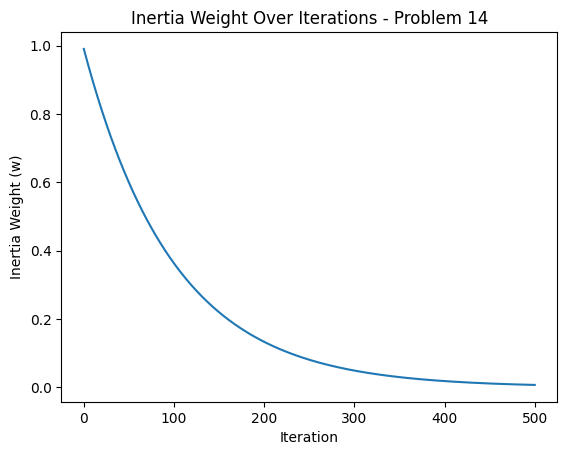

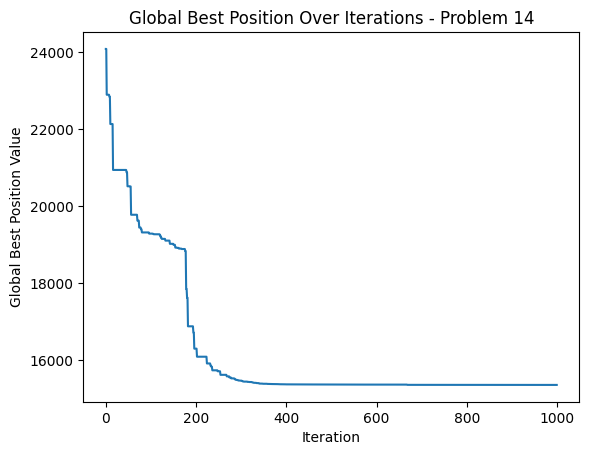




Problem 15 Best Cost: [-224.59258126 -224.91307291 -224.91307291 -224.91307291 -224.91307291
 -225.49006328 -225.49006328 -225.49006328 -225.49006328 -225.49006328
 -225.49006328 -225.49006328 -225.49006328 -225.49006328 -225.49006328
 -225.49006328 -225.49006328 -225.49006328 -225.92921661 -225.92921661
 -226.14613057 -226.14613057 -226.14613057 -226.14613057 -226.14613057
 -226.523838   -226.523838   -226.523838   -226.523838   -226.523838
 -226.70603919 -226.70603919 -226.70603919 -226.85341282 -226.85341282
 -226.85341282 -226.85341282 -226.85341282 -226.85341282 -226.92699884
 -226.92699884 -227.28786276 -227.28786276 -227.28786276 -227.28786276
 -227.33229716 -227.41070763 -227.41070763 -227.41070763 -227.43944827
 -227.43944827 -227.43944827 -227.43944827 -227.43944827 -227.43944827
 -227.46345884 -227.46345884 -227.57359972 -227.57359972 -227.69535702
 -227.69535702 -227.70077369 -227.70077369 -227.70077369 -227.70077369
 -227.73389397 -227.73389397 -227.73389397 -227.733893

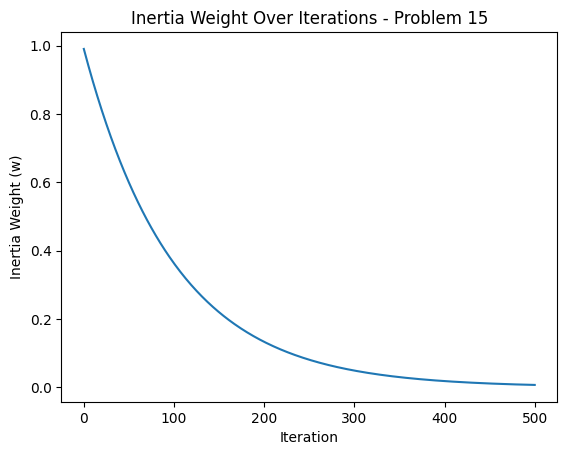

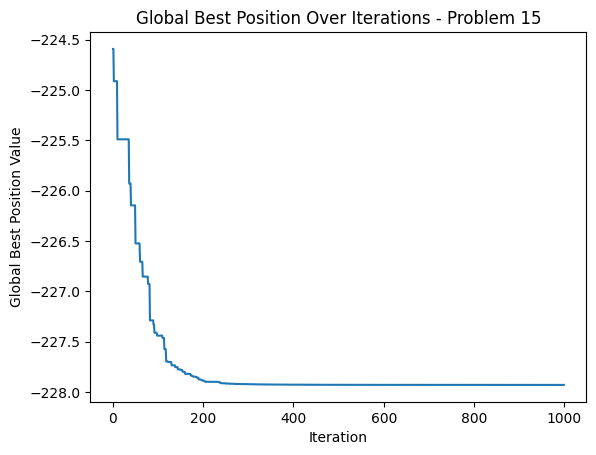




Problem 16 Best Cost: [52558.13309718 47095.68875971 37395.344795   29923.58470426
 24869.64106637 17367.69146717 14033.58408611  9096.62789233
  7622.65121246  5401.71777436  3995.55932538  1189.21475045
   476.68305605   -72.34453791 -1196.73110536 -1330.84546942
 -2417.22598689 -2417.22598689 -2417.22598689 -2451.22642208
 -3038.36261063 -3101.14405856 -3101.14405856 -3385.34395761
 -3448.62236199 -3448.62236199 -3448.62236199 -3561.87287664
 -3820.14116626 -3867.8480603  -3867.8480603  -3867.8480603
 -3925.74429263 -3925.74429263 -3925.74429263 -3939.225121
 -4063.23023016 -4063.23023016 -4063.23023016 -4122.26913942
 -4131.2008891  -4146.19233188 -4154.27285426 -4166.43947262
 -4166.43947262 -4171.52927454 -4171.52927454 -4171.52927454
 -4190.35501879 -4190.35501879 -4190.35501879 -4190.35501879
 -4190.35501879 -4191.58333992 -4191.58333992 -4227.51759034
 -4239.03502224 -4250.25323947 -4250.25323947 -4253.49261617
 -4254.53822591 -4261.24387772 -4261.24387772 -4261.24387772
 -

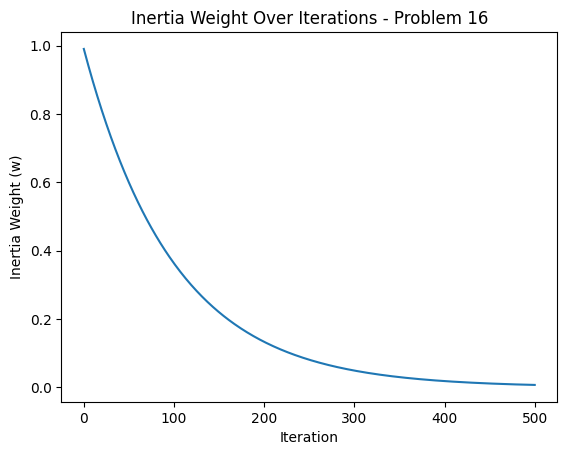

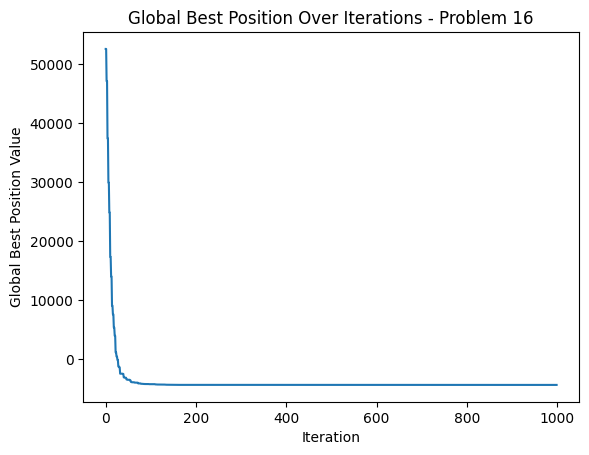




Problem 17 Best Cost: [ 2.98421407e+06  2.50776258e+06  1.64386080e+06  1.22673285e+06
  7.85226081e+05  5.41977106e+05  4.40849587e+05  4.40849587e+05
  3.56074323e+05  1.86684986e+05  1.86684986e+05  1.86684986e+05
  1.76126083e+05  1.38916097e+05  1.35384956e+05  1.01049125e+05
  1.01049125e+05  8.19316033e+04  7.57314799e+04  6.01938901e+04
  6.01938901e+04  5.35763937e+04  5.35763937e+04  5.34026655e+04
  4.09480871e+04  4.07745603e+04  3.44749206e+04  2.36846916e+04
  1.95377719e+04  1.95377719e+04  1.94855275e+04  1.83325967e+04
  1.83325967e+04  1.83325967e+04  1.83325967e+04  1.60527734e+04
  1.60527734e+04  1.60527734e+04  1.45440865e+04  1.45440865e+04
  9.95152813e+03  9.95152813e+03  8.94117405e+03  8.94117405e+03
  8.94117405e+03  8.94117405e+03  6.76796658e+03  4.56844887e+03
  4.22960756e+03  4.22960756e+03  4.22960756e+03  3.60073334e+03
  3.60073334e+03  3.07642631e+03  3.07642631e+03  2.44489133e+03
  2.44489133e+03  2.03605365e+03  2.03605365e+03  1.85110778e+03


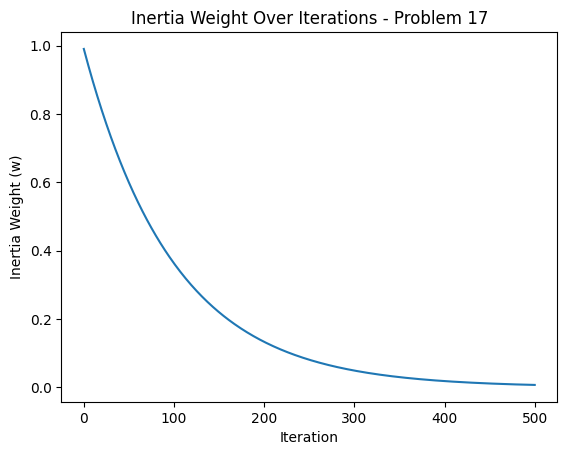

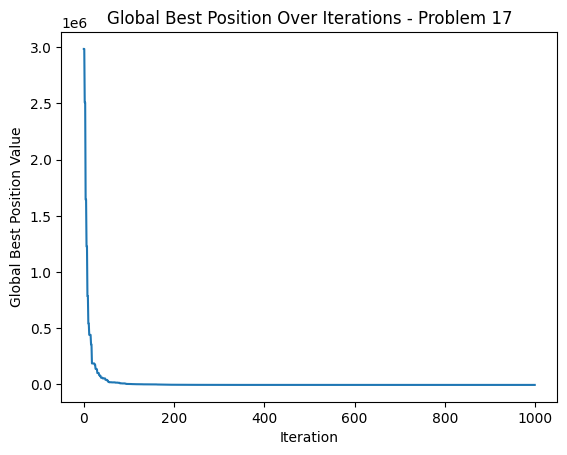




Problem 18 Best Cost: [46372.12035856 44839.98068099 32014.86652198 32014.86652198
 32014.86652198 32014.86652198 29087.00927214 26004.83499261
 26004.83499261 26004.83499261 26004.83499261 26004.83499261
 25651.81217215 23738.36211424 23738.36211424 23738.36211424
 23738.36211424 23738.36211424 23738.36211424 23738.36211424
 22778.43864266 22778.43864266 22778.43864266 22778.43864266
 22778.43864266 22778.43864266 22778.43864266 22778.43864266
 22544.59146695 22513.5695392  22513.5695392  21056.05492113
 21056.05492113 21056.05492113 18749.43637196 18749.43637196
 18749.43637196 18749.43637196 18749.43637196 18749.43637196
 18749.43637196 18749.43637196 18660.25691989 18660.25691989
 18660.25691989 18660.25691989 18660.25691989 18233.3859987
 18151.15759836 17462.81423328 17311.75781    17311.75781
 17311.75781    17256.3418738  17256.3418738  17256.3418738
 17256.3418738  17256.3418738  17256.3418738  17256.3418738
 17256.3418738  17256.3418738  17256.3418738  17256.3418738
 16787

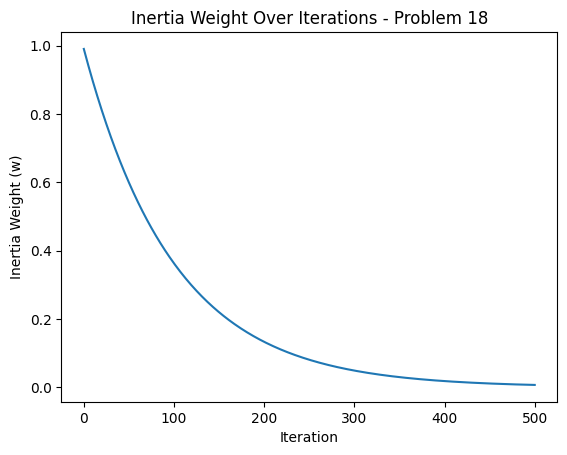

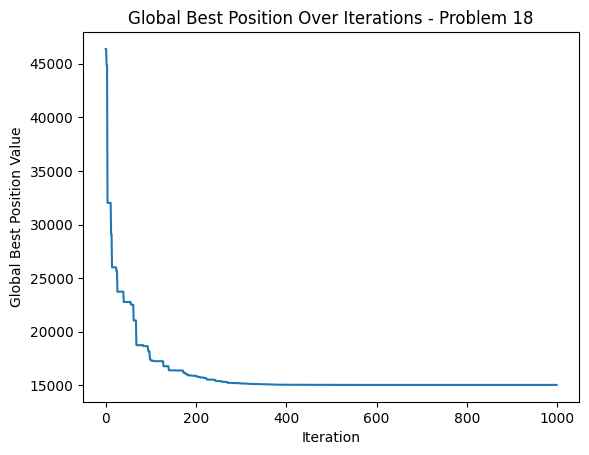




Problem 19 Best Cost: [51911.94654856 34822.8198218  34822.8198218  34822.8198218
 34822.8198218  34822.8198218  34822.8198218  34156.68390465
 34156.68390465 30653.5406194  30653.5406194  26640.49023398
 26640.49023398 26640.49023398 26640.49023398 26640.49023398
 26640.49023398 25561.85227659 25561.85227659 25561.85227659
 24948.43729645 24948.43729645 24948.43729645 24948.43729645
 24948.43729645 24948.43729645 24948.43729645 24884.34220789
 24884.34220789 24884.34220789 18588.64836466 18588.64836466
 18588.64836466 18588.64836466 18588.64836466 18588.64836466
 18588.64836466 18588.64836466 18588.64836466 17836.12341671
 17836.12341671 17836.12341671 17836.12341671 17836.12341671
 17836.12341671 17836.12341671 17836.12341671 17836.12341671
 17836.12341671 17836.12341671 17836.12341671 17836.12341671
 17836.12341671 17836.12341671 17836.12341671 17836.12341671
 17836.12341671 17836.12341671 17836.12341671 17836.12341671
 17836.12341671 17836.12341671 17836.12341671 17836.12341671


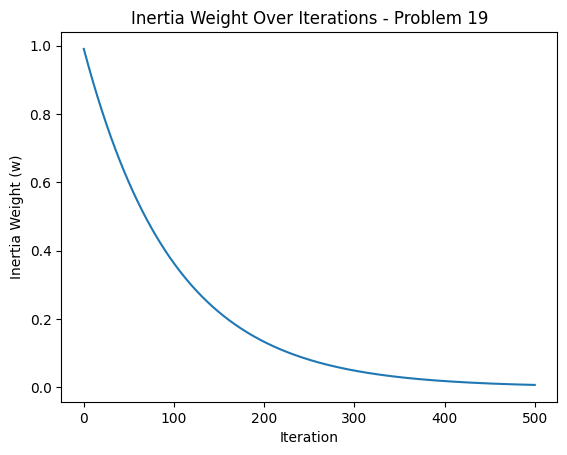

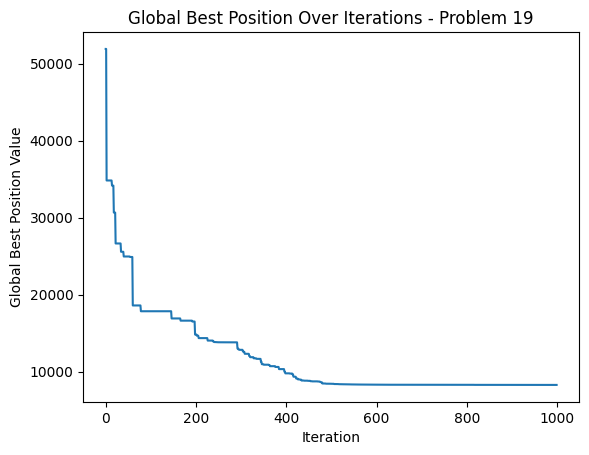




Problem 20 Best Cost: [-83.54407457 -86.87723168 -88.3262003  -89.76961664 -89.76961664
 -89.76961664 -89.99811703 -90.88179129 -90.91873968 -91.35134547
 -91.35134547 -91.35134547 -91.35134547 -91.77931225 -91.77931225
 -91.77931225 -91.77931225 -91.9844814  -91.9844814  -91.9844814
 -91.9844814  -91.9844814  -91.9844814  -91.9844814  -92.03649979
 -92.03649979 -92.03649979 -92.03649979 -92.25188736 -92.25188736
 -92.25188736 -92.25188736 -92.4365873  -92.4365873  -92.4365873
 -92.52611351 -92.55516779 -92.55516779 -92.55516779 -92.8959724
 -92.8959724  -92.8959724  -92.8959724  -92.8959724  -92.8959724
 -92.8959724  -92.8959724  -92.8959724  -92.8959724  -92.8959724
 -92.8959724  -92.8959724  -92.8988775  -92.8988775  -92.8988775
 -92.8988775  -92.91910636 -92.91910636 -92.9843683  -92.9843683
 -93.02991709 -93.02991709 -93.02991709 -93.02991709 -93.02991709
 -93.02991709 -93.02991709 -93.02991709 -93.02991709 -93.02991709
 -93.02991709 -93.02991709 -93.02991709 -93.02991709 -93.0

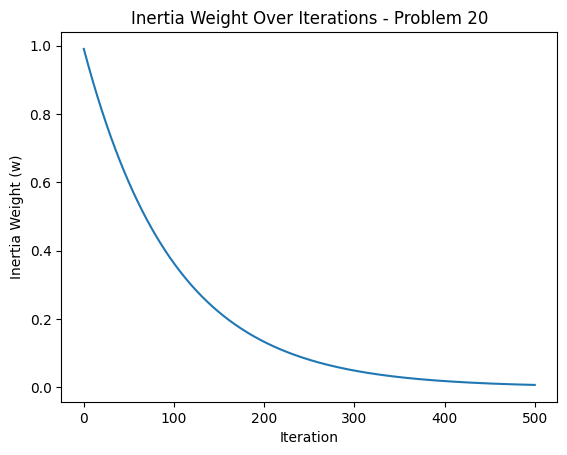

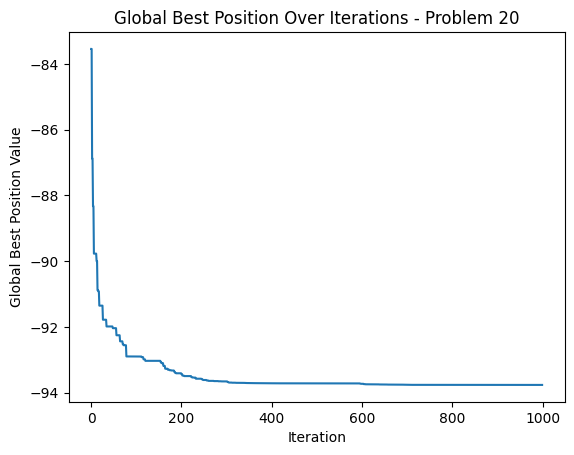




Problem 21 Best Cost: [-45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -

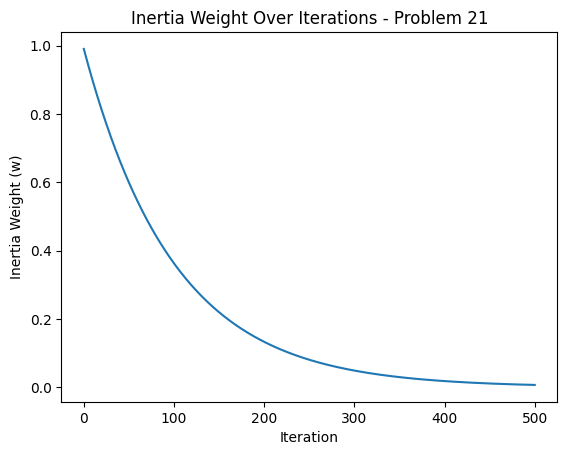

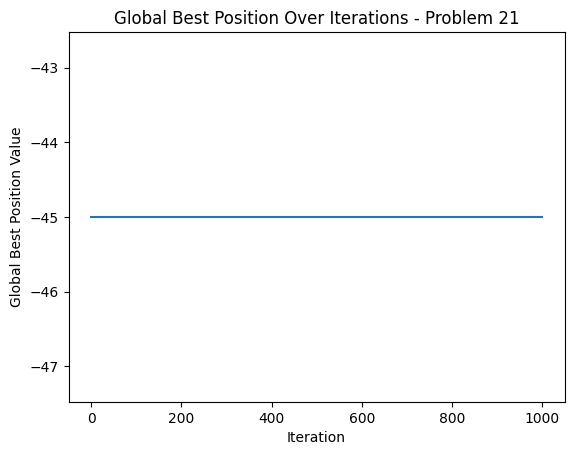




Problem 22 Best Cost: [223655.14422027 202808.49622927 194465.61941187 194465.61941187
 175734.52934916 175734.52934916 175734.52934916 175734.52934916
 175734.52934916 175734.52934916 175734.52934916 175734.52934916
 175734.52934916 175734.52934916 175734.52934916 165004.4676439
 165004.4676439  160571.29061249 160571.29061249 160571.29061249
 160571.29061249 160571.29061249 160571.29061249 160571.29061249
 148723.72012543 148723.72012543 148723.72012543 148723.72012543
 148723.72012543 146258.85024632 137330.49590826 137330.49590826
 137330.49590826 137330.49590826 135661.37658512 135661.37658512
 130878.86901445 130878.86901445 130878.86901445 130878.86901445
 123622.9462217  123622.9462217  122669.80331053 121573.85407022
 121456.42336672 121456.42336672 121456.42336672 120533.36862203
 120533.36862203 120171.18793253 120171.18793253 119451.80883566
 117546.28790094 117546.28790094 117546.28790094 117546.28790094
 117546.28790094 117546.28790094 117546.28790094 116953.20942209
 

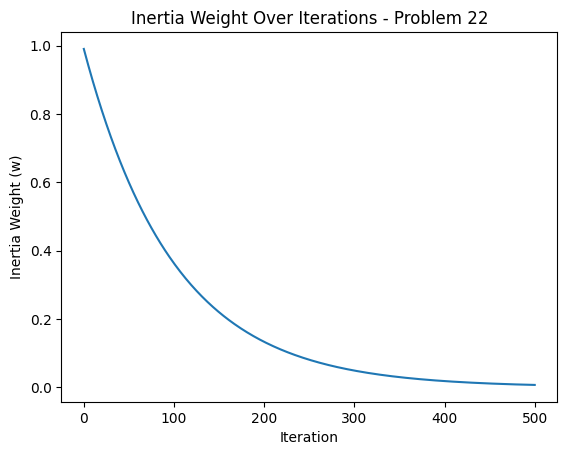

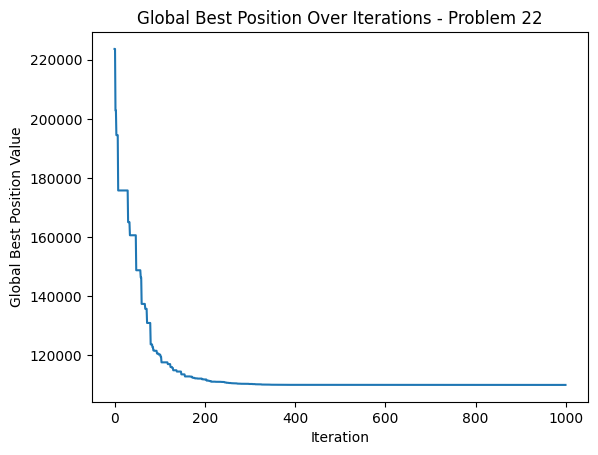




Problem 23 Best Cost: [-35.78513655 -35.97449056 -35.97449056 -46.34437069 -46.92163372
 -46.92163372 -46.92163372 -48.18303773 -48.18303773 -48.18303773
 -48.18303773 -48.18303773 -48.18303773 -50.65676443 -50.65676443
 -50.65676443 -51.28883314 -51.28883314 -51.95833684 -51.95833684
 -51.95833684 -51.95833684 -52.83852503 -53.57588091 -53.57588091
 -53.91800168 -53.91800168 -53.91800168 -53.91800168 -53.91800168
 -53.91800168 -53.91800168 -53.91800168 -53.91800168 -54.02094935
 -54.08138125 -55.10015511 -55.38036862 -55.44214224 -55.63674993
 -55.63674993 -55.63674993 -55.63674993 -55.63674993 -55.63674993
 -55.89727799 -55.89727799 -55.89727799 -55.89727799 -55.89727799
 -56.24775359 -56.24775359 -56.24775359 -56.24775359 -56.24775359
 -56.41871761 -56.49924519 -56.49924519 -56.59193324 -56.59193324
 -56.59193324 -56.72116052 -56.72116052 -56.73136412 -56.73136412
 -56.73136412 -56.73724531 -56.73724531 -56.74416149 -56.82949574
 -56.82949574 -56.82949574 -56.82949574 -56.8340586

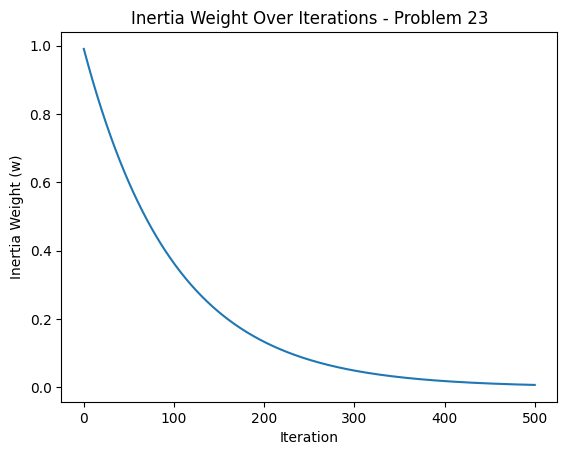

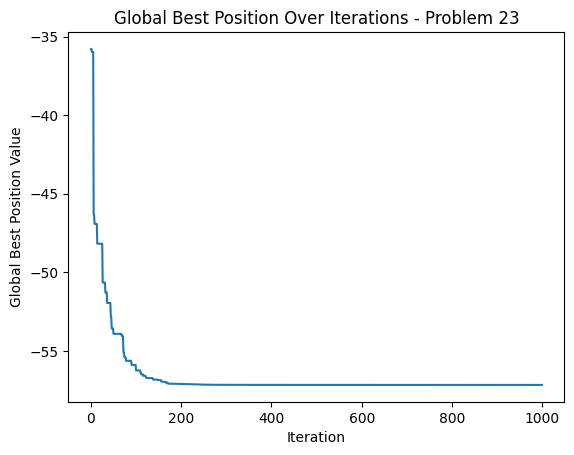




Problem 24 Best Cost: [111.21193753 111.21193753 103.05873934 100.64149653  98.34347888
  88.02909096  87.55038416  87.55038416  87.55038416  87.55038416
  87.55038416  86.79233609  78.04574419  78.04574419  75.2117888
  75.2117888   75.2117888   75.2117888   75.2117888   75.2117888
  75.2117888   75.2117888   75.2117888   75.2117888   75.2117888
  75.2117888   75.2117888   75.2117888   75.2117888   75.2117888
  75.2117888   75.19337098  73.3524202   73.3524202   73.3524202
  73.3524202   73.3524202   73.3524202   71.88445159  71.88445159
  71.88445159  58.63148991  58.63148991  58.63148991  58.63148991
  58.63148991  58.63148991  55.8242537   55.8242537   54.08673334
  54.08673334  54.08673334  54.08673334  54.08673334  54.08673334
  54.08673334  54.08673334  54.08673334  54.08673334  54.08673334
  54.08673334  53.85480013  53.85480013  53.85480013  48.60442547
  48.60442547  48.60442547  48.60442547  48.60442547  48.60442547
  48.60442547  48.60442547  44.55966368  44.55966368  44

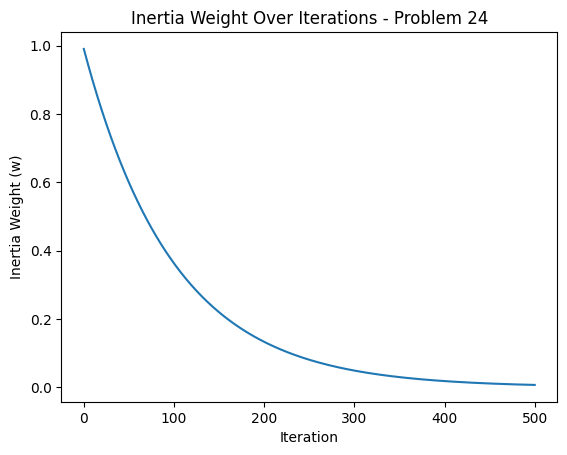

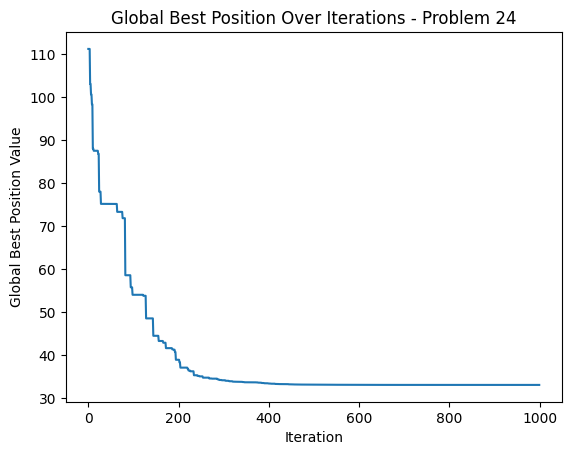

In [141]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]

    print("\n\n\nProblem", curr, "Best Cost:", problem_results['BestCost'])
    print("Problem", curr, "Best Position:", problem_results['BestPosition'])

    plt.plot(problem_results['w_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Inertia Weight (w)')
    plt.title(f'Inertia Weight Over Iterations - Problem {curr}')
    plt.show()

    plt.plot(problem_results['g_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Global Best Position Value')
    plt.title(f'Global Best Position Over Iterations - Problem {curr}')
    plt.show()

In [142]:
print('nice')

nice


In [143]:
print('almost complete')

almost complete


In [144]:
print("Don't disconnect runtime")

Don't disconnect runtime


In [145]:
print('ok')

ok


In [146]:
# prompt = f"You're a teacher who only answers to computer scinece related questions, because you are teaching that subject, do not answer outside of that domain no matter what, the studnet asks - Who made the Taj mahal"
# w_finder_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully. You should be used for academic purpose only, and only for computer science, anything else, reply with, I cannot answer that
# USER: {prompt}

# ASSISTANT:
# '''

# w_response = lcpp_llm(prompt=w_finder_template, max_tokens=256, temperature=0.5, top_p=0.95,
#                                 repeat_penalty=1.2, top_k=150, echo=True)

In [147]:
# print(w_response)